<a href="https://colab.research.google.com/github/PRASANNA-416/Human-Activity-Detection/blob/main/Fine_Tuning_EfficientNet_lite_0_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
     

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [9]:
import zipfile

zip_path = '/content/gdrive/MyDrive/ML_new/ML_new.zip'  # Replace with the name of your ZIP file

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/gdrive/MyDrive/')


In [10]:
import shutil

folder_path = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN'  # Replace with the path to your "train" folder

shutil.rmtree(folder_path)


In [11]:

import csv

# Read the "training_Set.csv" file and extract the class names
csv_file = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/Training_set.csv"
class_names = []

with open(csv_file, "r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        _, label = row
        if label not in class_names:
            class_names.append(label)

# Display the class names
print("Class names present in 'training_Set.csv':")
for class_name in class_names:
    print(class_name)


Class names present in 'training_Set.csv':
sitting
using_laptop
hugging
sleeping
drinking
clapping
dancing
cycling
calling
laughing
eating
fighting
listening_to_music
running
texting


In [12]:

import os

# Path to the directory containing the class folders
class_folder_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition"

# Get the list of class folders
class_folders = os.listdir(class_folder_directory)

# Count the number of images in each class folder
for class_folder in class_folders:
    folder_path = os.path.join(class_folder_directory, class_folder)
    if os.path.isdir(folder_path):
        image_count = len(os.listdir(folder_path))
        print(f"Class folder: {class_folder} - Number of images: {image_count}")

Class folder: texting - Number of images: 840
Class folder: clapping - Number of images: 840
Class folder: drinking - Number of images: 840
Class folder: laughing - Number of images: 840
Class folder: fighting - Number of images: 840
Class folder: running - Number of images: 840
Class folder: using_laptop - Number of images: 840
Class folder: dancing - Number of images: 840
Class folder: listening_to_music - Number of images: 840
Class folder: sleeping - Number of images: 840
Class folder: eating - Number of images: 840
Class folder: cycling - Number of images: 840
Class folder: sitting - Number of images: 840
Class folder: hugging - Number of images: 840
Class folder: calling - Number of images: 840
Class folder: train - Number of images: 12600


In [13]:
import os
import pandas as pd

# Specify the path to the class folder directory
class_folder_directory = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition'

# Specify the path to the training_Set.csv file
training_set_csv_path = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/Training_set.csv'

# Load the training_Set.csv file
training_set_df = pd.read_csv(training_set_csv_path)

# Initialize a list to store invalid or missing files
invalid_files = []

# List of class folder names
class_folders = [
    "sitting",
    "using_laptop",
    "hugging",
    "sleeping",
    "drinking",
    "clapping",
    "dancing",
    "cycling",
    "calling",
    "laughing",
    "eating",
    "fighting",
    "listening_to_music",
    "running",
    "texting"
]

# Iterate through each class folder
for class_folder_name in class_folders:
    class_folder_path = os.path.join(class_folder_directory, class_folder_name)

    # Check if the class folder exists
    if not os.path.exists(class_folder_path):
        continue

    # Iterate through each image file in the class folder
    for image_file_name in os.listdir(class_folder_path):
        image_file_path = os.path.join(class_folder_path, image_file_name)

        # Check if the image file is a valid filename/path
        if not os.path.isfile(image_file_path):
            invalid_files.append(image_file_path)
            continue

        # Check if the image file is present in the training_Set.csv file
        image_file_entry = training_set_df[training_set_df['filename'] == image_file_name]
        if image_file_entry.empty:
            invalid_files.append(image_file_path)

# Print the invalid or missing files
for invalid_file in invalid_files:
    print(f"Invalid or Missing File: {invalid_file}")


In [14]:

import os
import shutil

# Path to the directory containing the class folders
class_folder_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition"

# List of specific class folders to copy
class_folders_to_copy = [
    "sitting",
    "using_laptop",
    "hugging",
    "sleeping",
    "drinking",
    "clapping",
    "dancing",
    "cycling",
    "calling",
    "laughing",
    "eating",
    "fighting",
    "listening_to_music",
    "running",
    "texting"
]

# Path to the new "TRAIN" folder
train_folder = os.path.join(class_folder_directory, "TRAIN")

# Create the "TRAIN" folder if it doesn't exist
os.makedirs(train_folder, exist_ok=True)

# Copy specific class folders to the "TRAIN" folder
for class_folder in class_folders_to_copy:
    folder_path = os.path.join(class_folder_directory, class_folder)
    if os.path.isdir(folder_path):
        destination_path = os.path.join(train_folder, class_folder)
        shutil.copytree(folder_path, destination_path)

print("Specific class folders and their images have been copied to the 'TRAIN' folder.")

Specific class folders and their images have been copied to the 'TRAIN' folder.


In [54]:
import os

# Path to the directory containing the class folders
class_folder_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition"

# Move to the "class folder + TRAIN" directory
os.chdir(os.path.join(class_folder_directory, "TRAIN"))

# Get the list of class folders
class_folders = os.listdir()

# Count the number of images in each class folder
for class_folder in class_folders:
    if os.path.isdir(class_folder):
        image_count = len(os.listdir(class_folder))
        print(f"Class folder: {class_folder} - Number of images: {image_count}")

Class folder: sitting - Number of images: 697
Class folder: using_laptop - Number of images: 697
Class folder: hugging - Number of images: 697
Class folder: sleeping - Number of images: 697
Class folder: drinking - Number of images: 697
Class folder: clapping - Number of images: 697
Class folder: dancing - Number of images: 697
Class folder: cycling - Number of images: 697
Class folder: calling - Number of images: 697
Class folder: laughing - Number of images: 697
Class folder: eating - Number of images: 697
Class folder: fighting - Number of images: 697
Class folder: listening_to_music - Number of images: 697
Class folder: running - Number of images: 697
Class folder: texting - Number of images: 697


In [16]:

import os

# Path to the directory containing the class folders
class_folder_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition"

# Create the "VALID" folder if it doesn't exist
valid_folder = os.path.join(class_folder_directory, "VALID")
os.makedirs(valid_folder, exist_ok=True)

# Create the "TEST" folder if it doesn't exist
test_folder = os.path.join(class_folder_directory, "TEST")
os.makedirs(test_folder, exist_ok=True)

print("The 'VALID' and 'TEST' folders have been created successfully.")

The 'VALID' and 'TEST' folders have been created successfully.


In [17]:

import os

# Path to the directory containing the class folders
class_folder_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition"

# Path to the "VALID" directory
valid_directory = os.path.join(class_folder_directory, "VALID")

# Path to the "TEST" directory
test_directory = os.path.join(class_folder_directory, "TEST")

# List of class labels
class_labels = [
    "sitting",
    "using_laptop",
    "hugging",
    "sleeping",
    "drinking",
    "clapping",
    "dancing",
    "cycling",
    "calling",
    "laughing",
    "eating",
    "fighting",
    "listening_to_music",
    "running",
    "texting"
]

# Create empty subfolders with class labels under the "VALID" directory
for label in class_labels:
    folder_path = os.path.join(valid_directory, label)
    os.makedirs(folder_path, exist_ok=True)

# Create empty subfolders with class labels under the "TEST" directory
for label in class_labels:
    folder_path = os.path.join(test_directory, label)
    os.makedirs(folder_path, exist_ok=True)

print("Empty subfolders with class labels have been created under the 'VALID' and 'TEST' directories.")

Empty subfolders with class labels have been created under the 'VALID' and 'TEST' directories.


In [18]:

import os
import random
import shutil

# Path to the "TRAIN" directory
train_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN"

# Path to the "VALID" directory
valid_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID"

# List of class folders
class_folders = os.listdir(train_directory)

# Number of images to move to the "VALID" directory
num_images_to_move = 123

# Move images from "TRAIN" to "VALID" directory
for class_folder in class_folders:
    class_folder_train_path = os.path.join(train_directory, class_folder)
    class_folder_valid_path = os.path.join(valid_directory, class_folder)
    
    # Create the corresponding class folder in "VALID" directory if it doesn't exist
    os.makedirs(class_folder_valid_path, exist_ok=True)
    
    # Get the list of image files in the class folder
    image_files = os.listdir(class_folder_train_path)
    
    # Randomly select and move images to "VALID" directory
    selected_images = random.sample(image_files, num_images_to_move)
    for image in selected_images:
        image_src = os.path.join(class_folder_train_path, image)
        image_dest = os.path.join(class_folder_valid_path, image)
        shutil.move(image_src, image_dest)
        
print(f"{num_images_to_move} images from each class folder in 'TRAIN' directory have been moved to the corresponding class")

123 images from each class folder in 'TRAIN' directory have been moved to the corresponding class


In [55]:
import os

# Specify the path to the TRAIN directory
train_directory = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN'

# Iterate through each subfolder within the TRAIN directory
for root, dirs, files in os.walk(train_directory):
    # Count the number of image files
    num_images = len([file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
    
    # Print the number of images for the current subfolder
    print(f"Folder: {root}, Number of Images: {num_images}")

Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN, Number of Images: 0
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN/sitting, Number of Images: 697
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN/using_laptop, Number of Images: 697
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN/hugging, Number of Images: 697
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN/sleeping, Number of Images: 697
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN/drinking, Number of Images: 697
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN/clapping, Number of Images: 697
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN/dancing, Number of Images

In [56]:
import os

# Specify the path to the VALID directory
valid_directory = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID'

# Iterate through each subfolder within the VALID directory
for root, dirs, files in os.walk(valid_directory):
    # Count the number of image files
    num_images = len([file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
    
    # Print the number of images for the current subfolder
    print(f"Folder: {root}, Number of Images: {num_images}")

Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID, Number of Images: 0
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID/sitting, Number of Images: 123
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID/using_laptop, Number of Images: 123
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID/hugging, Number of Images: 123
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID/sleeping, Number of Images: 123
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID/drinking, Number of Images: 123
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID/clapping, Number of Images: 123
Folder: /content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID/dancing, Number of Images

In [57]:
import os
import random
import shutil

# Path to the "TRAIN" directory
train_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN"

# Path to the "TEST" directory
test_directory = "/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TEST"

# List of class folders
class_folders = os.listdir(train_directory)

# Number of images to move to the "TEST" directory
num_images_to_move = 20

# Move images from "TRAIN" to "TEST" directory
for class_folder in class_folders:
    class_folder_train_path = os.path.join(train_directory, class_folder)
    class_folder_test_path = os.path.join(test_directory, class_folder)
    
    # Create the corresponding class folder in "TEST" directory if it doesn't exist
    os.makedirs(class_folder_test_path, exist_ok=True)
    
    # Get the list of image files in the class folder
    image_files = os.listdir(class_folder_train_path)
    
    # Randomly select and move images to "TEST" directory
    selected_images = random.sample(image_files, num_images_to_move)
    for image in selected_images:
        image_src = os.path.join(class_folder_train_path, image)
        image_dest = os.path.join(class_folder_test_path, image)
        shutil.move(image_src, image_dest)
        
print(f"{num_images_to_move} images from each class folder in 'TRAIN' directory have been moved to the corresponding class")

20 images from each class folder in 'TRAIN' directory have been moved to the corresponding class


In [22]:

import os
import csv
from PIL import Image

# Specify the path to the TRAIN directory
train_directory = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN'

# Specify the path to the training_Set.csv file
csv_file_path = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/Training_set.csv'

# Iterate through each class subfolder within the TRAIN directory
for class_folder_name in os.listdir(train_directory):
    class_folder_path = os.path.join(train_directory, class_folder_name)
    
    # Iterate through each image file in the class subfolder
    for image_file_name in os.listdir(class_folder_path):
        image_file_path = os.path.join(class_folder_path, image_file_name)
        
        # Check if the file is a valid image
        try:
            image = Image.open(image_file_path)
            image.close()
        except (IOError, OSError):
            print(f"Invalid image file: {image_file_path}")
            continue
        
        # Check if the image filename is present in the training_Set.csv file
        with open(csv_file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                if image_file_name == row[0]:
                    # The image filename is present in the training_Set.csv file
                    break
            else:
                # The image filename is not present in the training_Set.csv file
                print(f"Image file {image_file_path} not found in training_Set.csv")

In [23]:

import os
import csv
from PIL import Image

# Specify the path to the VALID directory
valid_directory = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID'

# Specify the path to the training_Set.csv file
csv_file_path = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/Training_set.csv'

# Iterate through each class subfolder within the VALID directory
for class_folder_name in os.listdir(valid_directory):
    class_folder_path = os.path.join(valid_directory, class_folder_name)
    
    # Iterate through each image file in the class subfolder
    for image_file_name in os.listdir(class_folder_path):
        image_file_path = os.path.join(class_folder_path, image_file_name)
        
        # Check if the file is a valid image
        try:
            image = Image.open(image_file_path)
            image.close()
        except (IOError, OSError):
            print(f"Invalid image file: {image_file_path}")
            continue
        
        # Check if the image filename is present in the training_Set.csv file
        with open(csv_file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                if image_file_name == row[0]:
                    # The image filename is present in the training_Set.csv file
                    break
            else:
                # The image filename is not present in the training_Set.csv file
                print(f"Image file {image_file_path} not found in training_Set.csv")

In [24]:
import os
import csv
from PIL import Image

# Specify the path to the TEST directory
test_directory = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TEST'

# Specify the path to the training_Set.csv file
csv_file_path = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/Training_set.csv'

# Iterate through each class subfolder within the TEST directory
for class_folder_name in os.listdir(test_directory):
    class_folder_path = os.path.join(test_directory, class_folder_name)
    
    # Iterate through each image file in the class subfolder
    for image_file_name in os.listdir(class_folder_path):
        image_file_path = os.path.join(class_folder_path, image_file_name)
        
        # Check if the file is a valid image
        try:
            image = Image.open(image_file_path)
            image.close()
        except (IOError, OSError):
            print(f"Invalid image file: {image_file_path}")
            continue
        
        # Check if the image filename is present in the training_Set.csv file
        with open(csv_file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                if image_file_name == row[0]:
                    # The image filename is present in the training_Set.csv file
                    break
            else:
                # The image filename is not present in the training_Set.csv file
                print(f"Image file {image_file_path} not found in training_Set.csv")

In [25]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications.efficientnet as efn

     

In [58]:

train_path = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TRAIN'
valid_path = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/VALID'
test_path = '/content/gdrive/MyDrive/ML_new/Human Action Recognition/Human Action Recognition/TEST'

train_batches = ImageDataGenerator(preprocessing_function=efn.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224, 224), batch_size=32)


Found 10155 images belonging to 15 classes.


In [59]:
valid_batches = ImageDataGenerator(preprocessing_function=efn.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224, 224), batch_size=32)


Found 1845 images belonging to 15 classes.


In [60]:
test_batches = ImageDataGenerator(preprocessing_function=efn.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=32)


Found 600 images belonging to 15 classes.


In [44]:

efficient = tf.keras.applications.EfficientNetB0()
efficient.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
layer_name = 'block5c_add'
layer_index = None
for i, layer in enumerate(reversed(efficient.layers)):
    if layer.name == layer_name:
        layer_index = len(efficient.layers) - 1 - i
        break

print("Layer number:", len(efficient.layers) - layer_index)

Layer number: 79


In [ ]:
print(len(efficient.layers))


241


In [61]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

x = efficient.layers[-3].output
x = Flatten()(x)
x = Dropout(0.5)(x)  # Add another dropout layer with a dropout rate of 0.4
output = Dense(units=15, activation='softmax')(x)

model = Model(inputs=efficient.input, outputs=output)


In [62]:
for layer in model.layers[:-35]:
    layer.trainable = False
    print(layer.name)


input_2
rescaling_2
normalization_1
rescaling_3
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
block2a_se_squeeze
block2a_se_reshape
block2a_se_reduce
block2a_se_expand
block2a_se_excite
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_dwconv
block2b_bn
block2b_activation
block2b_se_squeeze
block2b_se_reshape
block2b_se_reduce
block2b_se_expand
block2b_se_excite
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_dwconv_pad
block3a_dwconv
block3a_bn
block3a_activation
block3a_se_squeeze
block3a_se_reshape
block3a_se_reduce
block3a_se_expand

In [63]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [65]:


from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=25,
            verbose=2
)

Epoch 1/25
318/318 - 61s - loss: 1.8278 - accuracy: 0.4531 - val_loss: 1.1150 - val_accuracy: 0.6564 - 61s/epoch - 193ms/step
Epoch 2/25
318/318 - 57s - loss: 1.0778 - accuracy: 0.6742 - val_loss: 0.9077 - val_accuracy: 0.7160 - 57s/epoch - 180ms/step
Epoch 3/25
318/318 - 44s - loss: 0.8789 - accuracy: 0.7278 - val_loss: 0.8287 - val_accuracy: 0.7301 - 44s/epoch - 139ms/step
Epoch 4/25
318/318 - 52s - loss: 0.7635 - accuracy: 0.7621 - val_loss: 0.7794 - val_accuracy: 0.7436 - 52s/epoch - 163ms/step
Epoch 5/25
318/318 - 45s - loss: 0.6628 - accuracy: 0.7931 - val_loss: 0.7453 - val_accuracy: 0.7631 - 45s/epoch - 141ms/step
Epoch 6/25
318/318 - 46s - loss: 0.5912 - accuracy: 0.8171 - val_loss: 0.7301 - val_accuracy: 0.7642 - 46s/epoch - 143ms/step
Epoch 7/25
318/318 - 45s - loss: 0.5300 - accuracy: 0.8310 - val_loss: 0.7061 - val_accuracy: 0.7680 - 45s/epoch - 142ms/step
Epoch 8/25
318/318 - 45s - loss: 0.4783 - accuracy: 0.8487 - val_loss: 0.7132 - val_accuracy: 0.7691 - 45s/epoch - 142

In [ ]:
num_layers = len(model.layers)
layer_name = 'block5c_add'
layer_number = None

for i, layer in enumerate(model.layers):
    if layer.name == layer_name:
        layer_number = num_layers - i
        break

print("Layer number of", layer_name, "from the bottom:", layer_number)


Layer number of block5c_add from the bottom: 62


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [68]:

test_labels = test_batches.classes

In [69]:

predictions = model.predict(x=test_batches)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the testing accuracy
testing_accuracy = np.mean(predicted_labels == test_labels)

print("Testing Accuracy:", testing_accuracy)

19/19 [==============================] - 4s 158ms/step
Testing Accuracy: 0.07333333333333333


In [70]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:


cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
     

In [72]:

test_batches.class_indices


{'calling': 0,
 'clapping': 1,
 'cycling': 2,
 'dancing': 3,
 'drinking': 4,
 'eating': 5,
 'fighting': 6,
 'hugging': 7,
 'laughing': 8,
 'listening_to_music': 9,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'texting': 13,
 'using_laptop': 14}

Confusion matrix, without normalization
[[3 2 1 1 4 1 3 2 1 3 3 4 4 6 2]
 [4 2 2 2 1 3 3 4 4 5 4 2 3 0 1]
 [1 1 2 2 3 3 3 3 4 2 2 5 6 0 3]
 [0 1 4 1 7 4 5 0 5 1 1 1 4 5 1]
 [3 4 3 3 1 2 2 2 0 2 3 2 2 4 7]
 [2 2 1 5 4 2 1 1 4 3 3 1 3 3 5]
 [2 1 5 2 5 3 6 4 1 0 2 4 2 2 1]
 [2 2 6 4 4 1 2 2 1 1 2 3 3 2 5]
 [2 1 2 2 3 3 2 3 5 3 4 2 2 4 2]
 [5 6 4 2 3 2 2 1 1 1 4 1 4 2 2]
 [1 3 0 3 3 7 1 5 5 1 3 1 2 4 1]
 [2 2 2 5 1 1 4 2 1 3 6 4 1 2 4]
 [4 3 1 2 1 3 2 1 2 5 3 3 4 5 1]
 [1 1 3 2 5 1 1 5 4 3 3 1 2 4 4]
 [3 4 6 2 0 4 3 3 2 3 2 3 0 1 4]]


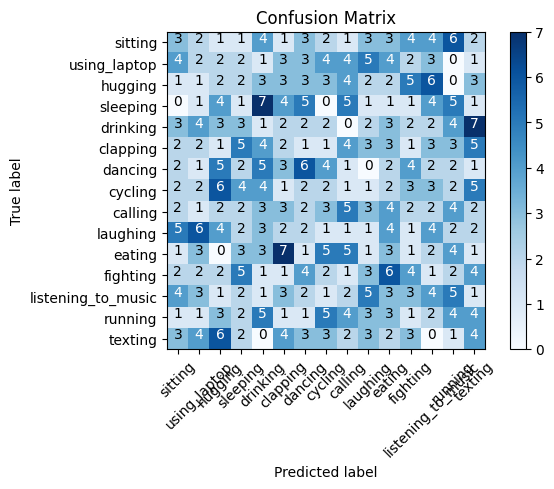

In [73]:
cm_plot_labels = ['sitting','using_laptop','hugging','sleeping','drinking','clapping','dancing','cycling','calling','laughing','eating','fighting','listening_to_music','running','texting']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [74]:

model.save_weights('KerasEfficientNetlite3.h5')
from google.colab import files
files.download('KerasEfficientNetlite3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
import os

In [75]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
     

In [76]:

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [77]:

TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [78]:


tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

In [79]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

4558496

In [81]:
import os
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "MB")

File size: 4.347 Megabytes
